<a href="https://colab.research.google.com/github/Noam-shahar/AI-course/blob/main/HW6_CatDog_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip /content/cats_and_dogs_filtered.zip

We're (and by we're I mean you) going to write a python code for google colab, using Keras :)
We'll use the "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" dataset, I already uploaded it to my drive by using the code:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip /content/cats_and_dogs_filtered.zip

We only need 3000 images from this dataset, where 2000 are train ones (1000 cats and 1000 dogs) and 1000 are in validation.

The main goal is to identify a dog or a cat in an image, and the network that will be created will output "cat" or "dog". We want the network to have 2 exits. The network won't give us a number, it will give 2 outputs that represent the probability for each label.
 While preprocessing, please resize the images to 150*150 (the images are not a constants resolution), keep them in color.
This time we want to build a Sequential Convolutional Neural Network following these layers:
1. conv2d layer with 32 kernels in 3*3 size (padding = same, activation=relu, inputshape=(150,150,3))
Please add note: "Convolution layer: we create a new picture according to the kernel's value"
2. maxpooling 2d layer of 2*2 size and stride=2
Please add note: "We start at the top left corner, and then in the 2*2 matrix choose the pixel that has the highest value, and bring it to a new picture, and start the process again not before moving the maxpooling matrix 2 steps right"
3. Another conv2d layer with 64 kernels in 3*3 size (padding = same, activation=relu, inputshape=(150,150,3))
4. Another maxpooling 2d layer of 2*2 size and stride=2
5.Another conv2d layer with 128kernels in 3*3 size (padding = same, activation=relu, inputshape=(150,150,3))
6.Another maxpooling 2d layer of 2*2 size and stride=2
7. Flatten layer
8. Dense layer that consists 512 neurons (activation=relu)
9. Dense layer that consists 10 neurons (activation=softmax)

At the end, the network should be fully connected (so make sure the inputs are always vectors).

Please show the confusion matrix at the end and show the accuracy while learning.

Show a few pictures of the data.
Use the ADAM optimizer:
in the model.compile(
optimizer=’adam’,
loss=’sparse_categorical_crossentropy’,
metrics[‘accuracy’])
Print the accuracy of the model.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 22s 284ms/step - loss: 0.7454 - accuracy: 0.5254 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 2/100
62/62 [==============================] - 19s 305ms/step - loss: 0.6915 - accuracy: 0.5269 - val_loss: 0.7024 - val_accuracy: 0.5111
Epoch 3/100
62/62 [==============================] - 17s 280ms/step - loss: 0.6780 - accuracy: 0.5854 - val_loss: 0.6825 - val_accuracy: 0.5192
Epoch 4/100
62/62 [==============================] - 18s 292ms/step - loss: 0.6816 - accuracy: 0.5640 - val_loss: 0.6453 - val_accuracy: 0.6139
Epoch 5/100
62/62 [==============================] - 19s 306ms/step - loss: 0.6769 - accuracy: 0.5752 - val_loss: 0.6534 - val_accuracy: 0.6270
Epoch 6/100
62/62 [==============================] - 18s 295ms/step - loss: 0.6477 - accuracy: 0.6230 - val_loss: 0.6218 - val_accuracy: 0.6411
Epoch 7/100
62/62 [==============================] -

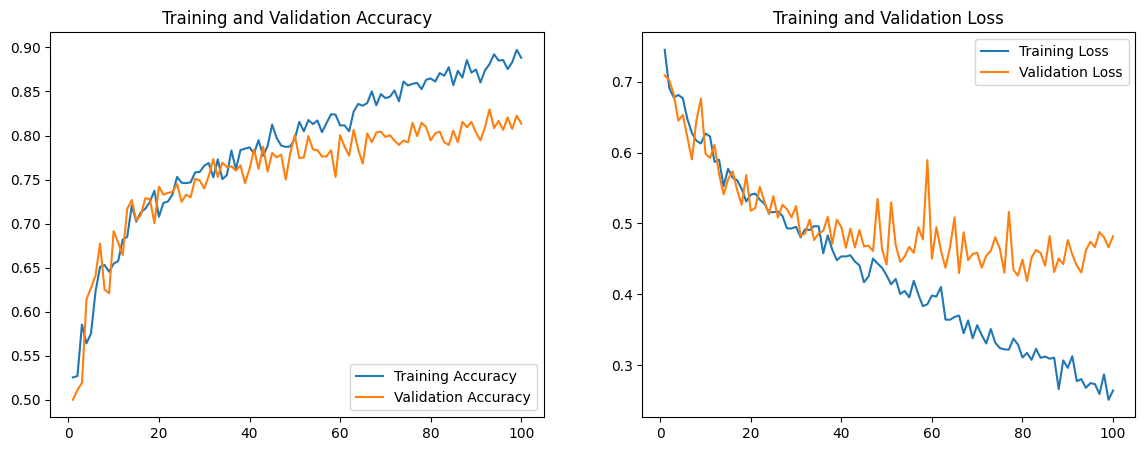

32/32 [==============================] - 2s 58ms/step
Confusion Matrix:
[[259 241]
 [280 220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       500
           1       0.48      0.44      0.46       500

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



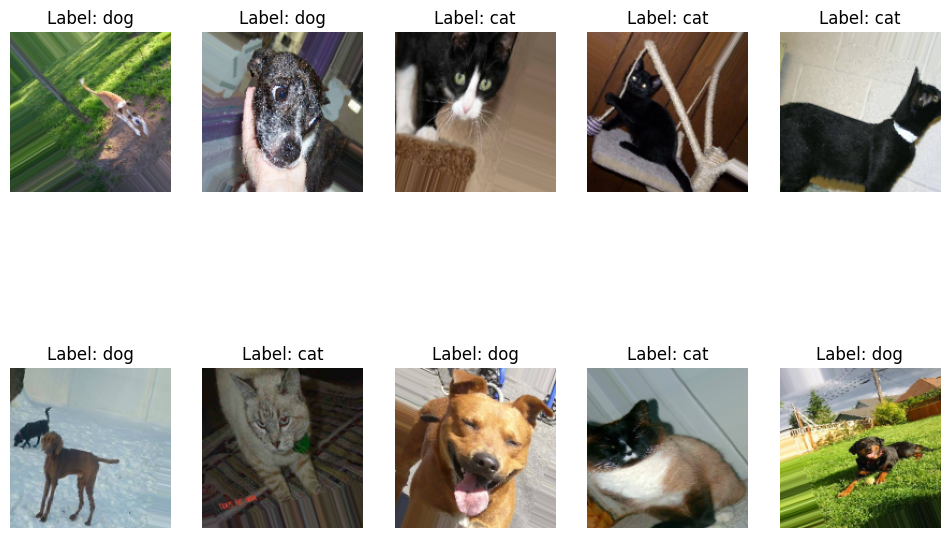


Final Model Accuracy: 81.50%


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Define paths to the train and validation datasets
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define image size and batch size
img_size = (150, 150)
batch_size = 32

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


# Build the Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Plotting accuracy and loss during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Generate predictions
predictions = model.predict(validation_generator)
y_pred = np.round(predictions).reshape(-1)
y_true = validation_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Show a few images from the dataset with labels as 'cat' or 'dog'
sample_images, sample_labels = next(train_generator)

class_labels = {0: 'cat', 1: 'dog'}

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {class_labels[int(sample_labels[i])]}")  # Display 'cat' or 'dog' based on the class label
    plt.axis('off')
plt.show()

# Print final accuracy
_, accuracy = model.evaluate(validation_generator, verbose=0)
print(f"\nFinal Model Accuracy: {accuracy * 100:.2f}%")
